In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('BoneCancerRaw.xlsx')
df2 = pd.read_excel('BoneCancerConvert.xlsx')

In [3]:
print(df1.shape)
print(df2.shape)

(1309, 6)
(1309, 4)


In [4]:
frame = [df2, df1]
df = pd.concat(frame, axis=1)
df_clean = df.drop(columns=['Probe ID', 'Species', 'Gene Name', 'ID', 'Gene Symbol'])
df_clean

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633
...,...,...,...,...,...
1304,64866,4.679561,4.855678,6.055085,4.430294
1305,9706,5.666462,5.683198,6.081623,5.394488
1306,9498,5.589828,5.233311,7.455269,7.145090
1307,85464,6.190972,6.977493,5.725543,5.968132


In [5]:
# df_clean.to_excel("BoneCancerStandardize.xlsx", index=False)

### Dataset Preprocessing

In [6]:
data = pd.read_excel("BoneCancerStandardize.xlsx")
data.head()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


In [7]:
data.shape

(1309, 5)

In [8]:
data.columns

Index(['Entrez ID', 'GSM921514', 'GSM92151', 'GSM921516', 'GSM921517'], dtype='object')

In [9]:
data.dtypes

Entrez ID      int64
GSM921514    float64
GSM92151     float64
GSM921516    float64
GSM921517    float64
dtype: object

In [10]:
data = data.astype({"Entrez ID": float})
data.dtypes

Entrez ID    float64
GSM921514    float64
GSM92151     float64
GSM921516    float64
GSM921517    float64
dtype: object

In [11]:
data.isnull().sum()

Entrez ID    0
GSM921514    0
GSM92151     0
GSM921516    0
GSM921517    0
dtype: int64

In [12]:
from sklearn import preprocessing

In [13]:
x_array = np.array(data["GSM921514"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.0514499 , 0.04576887, 0.02818003, ..., 0.02693141, 0.02982769,
        0.02447285]])

In [14]:
x_array = np.array(data["GSM92151"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04977201, 0.04343565, 0.02602008, ..., 0.02530974, 0.03374509,
        0.02381724]])

In [15]:
x_array = np.array(data["GSM921516"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04600891, 0.04493961, 0.02665391, ..., 0.03569763, 0.02741529,
        0.02420414]])

In [16]:
x_array = np.array(data["GSM921517"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04511043, 0.04729489, 0.02672853, ..., 0.03424284, 0.02860227,
        0.02543023]])

#### Exploratory Data Analysis

In [17]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
eda = pd.read_excel('BoneCancerStandardize.xlsx')

In [19]:
eda.head()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


#### Descriptive Statistics

In [20]:
ds = eda[['GSM921516', 'GSM921517']]
ds

,GSM921516,GSM921517
0,9.608725,9.412715
1,9.385408,9.868524
2,5.566532,5.577159
3,8.332415,8.084233
4,4.207195,3.386633
...,...,...
1304,6.055085,4.430294
1305,6.081623,5.394488
1306,7.455269,7.145090
1307,5.725543,5.968132


In [21]:
ds.sum()

GSM921516    7180.786895
GSM921517    7167.027734
dtype: float64

In [22]:
ds.mean()

GSM921516    5.485704
GSM921517    5.475193
dtype: float64

In [23]:
ds.std()

GSM921516    1.797152
GSM921517    1.812689
dtype: float64

In [24]:
ds.describe()

,GSM921516,GSM921517
count,1309.000000,1309.000000
mean,5.485704,5.475193
std,1.797152,1.812689
min,2.760774,2.909036
25%,4.107926,4.070238
50%,5.115662,5.142274
75%,6.470932,6.451610
max,14.507109,14.677448


#### Correlation

In [25]:
eda.corr()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
Entrez ID,1.000000,0.012300,0.006066,0.007811,-0.000765
GSM921514,0.012300,1.000000,0.973638,0.880600,0.885823
GSM92151,0.006066,0.973638,1.000000,0.866896,0.874949
GSM921516,0.007811,0.880600,0.866896,1.000000,0.928779
GSM921517,-0.000765,0.885823,0.874949,0.928779,1.000000


<AxesSubplot:>

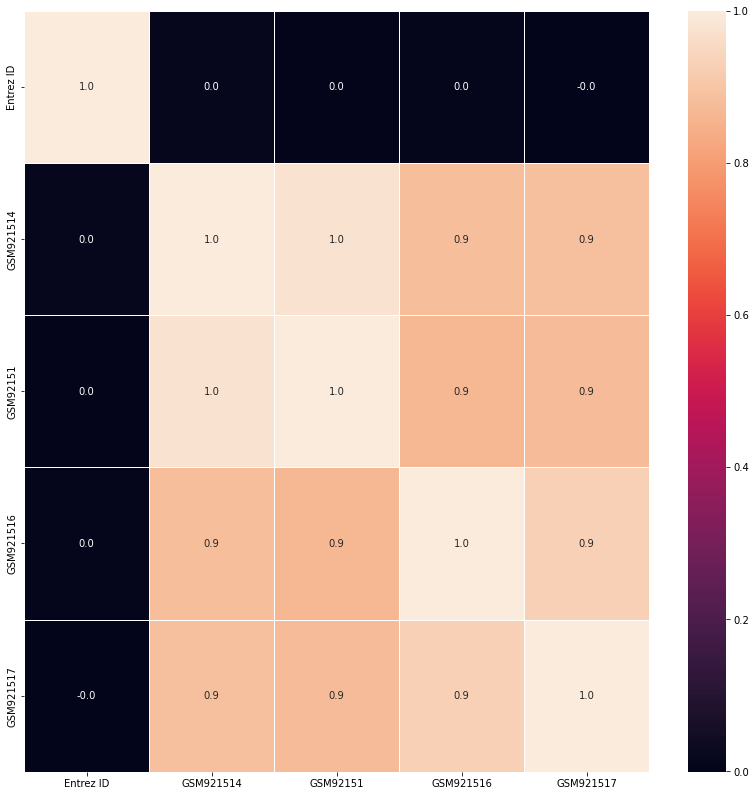

In [47]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(eda.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [27]:
eda[['GSM921516', 'GSM921517']].corr()

,GSM921516,GSM921517
GSM921516,1.000000,0.928779
GSM921517,0.928779,1.000000


(0.0, 15.26860112239203)

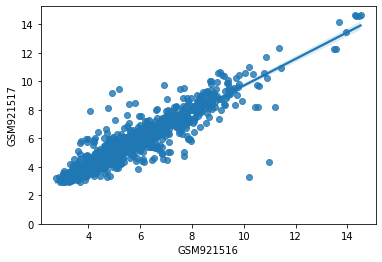

In [28]:
sns.regplot(x='GSM921516', y='GSM921517', data=eda)
plt.ylim(0,)

In [29]:
eda['GSM921516'].corr(data['GSM921517'])

0.9287789124071776

### Model Development

In [71]:
x = eda.copy()
y = eda['GSM921517']

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF=RandomForestClassifier(random_state=0)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [82]:
rfe = RFE(estimator=RF,n_features_to_select=10,step=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = RFE.fit_transform(x_train, y_train)
x_test = RFE.transform(x_test)

RF.fit(x_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'fit'

In [63]:
x.values.reshape(-1, 1)

array([[9.60872548],
       [9.38540796],
       [5.56653247],
       ...,
       [7.45526905],
       [5.72554322],
       [5.05491185]])

In [64]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.305292   5.7957335  3.3208642  3.2415898  3.159617   3.3123
  5.220309   3.8676457  8.730734   9.116875   3.961878   3.7246149
  7.044481   3.68481    4.256319   3.307929   3.9643095  6.431205
  6.0354676  5.905621   5.164232   5.3350677  5.3844485  5.9989486
  4.1868157  5.6438894  5.8422093  5.060849   5.4060116  4.1450887
  6.5097766  3.5657415  8.332415   5.592788   2.988669   7.702414
  3.5409102  3.7398634  5.810458   6.1137815  4.4378133  5.3574905
 10.199266   7.385467   5.0298676  7.9006443  6.526076   7.9598665
  3.6963382  4.2462816  6.1059017  8.057918   4.1276765  6.7580433
  4.571593   5.461214   3.8898416  7.026774   3.4979062  3.836425
  8.547182   3.9570413  3.6498992  8.548361   6.635808   4.6812387
  5.582105   4.4280925  7.0011263  6.6963687  5.296185   3.8586674
  6.9077716  5.938851   5.010148   5.7286572  3.8874938  6.6605315
  5.9780817  7.6308374  4.354086   6.975473   3.7580292  3.4081495
  5.188432   6.7510133  6.3079457  7.6918697  6.1496654  4.351501
  5.994973   4.9079823  9.772604   6.273665   5.5665326  5.3967566
  4.6648536  6.355137   6.2291245  5.1204824  7.0362654  3.425943
 10.914897   4.434939   3.9538395  4.5577226  7.390383   3.671339
  4.685597   8.186556   4.690981   4.3082905  9.819267   4.5391665
  4.695252   5.7120824  3.9065926  3.9003186  3.945075   6.988863
 10.7802105  6.4071803  8.7288475  3.7402694  6.65443    3.210396
  4.1688623  5.0996213  6.1718307  5.9339256  5.7838755  8.107256
  5.4609265  7.440954  14.507109   4.368131   6.749851   3.97055
  4.711183   4.684339   5.565025   6.32414    8.111326   5.0148635
  6.2363563  4.4599347  3.857953   9.512882   3.4500015  3.755178
  3.392847   4.929721   4.381308   6.404366   6.8003073  4.177828
  4.019274   5.9172974  3.9584062  3.8077488  7.455269   3.5071971
  8.131621   6.4873333  7.3732634  4.2435403  4.2262034  5.4835052
  5.322368   4.6122394  4.3392797  7.771165   5.4031076  7.724756
  2.9172597  5.2511797  3.3281107  4.011597   4.758626   3.9272504
  4.459121   4.9996705  7.1515985  5.3456545  6.028955   4.478779
  8.848613   5.045845   6.3588076  4.0233316  6.0280256  3.620527
  3.6656873  7.568627  13.569268   7.716365   8.255007  13.473818
  9.617533   8.78237    3.425943   6.898478   4.402543   5.272526
  6.3553114  7.5259943  5.9591317  6.4837403  3.330299   3.5598047
  7.944815   3.8236604  4.37388    3.2857738  6.4647465  4.3982615
  4.1359687  5.8228917  7.5644946  4.064552   6.4086     5.971742
  6.5615435  5.8350205  5.0391235  6.6719623  6.8416047  6.612929
  7.8481674  7.60514    3.9031363  3.24183    3.706105  11.375547
  3.7080336  6.273795   3.2532113  5.4845705  7.326536   4.529363
  4.3987265  8.318248   5.385221   3.9500754  4.7936096  3.6931396
  3.3979144  4.71664    8.238981   3.7067838  5.1394434  6.5452557
  5.1178956  6.125666   6.0490856  7.55807    9.242493   5.1675014
  8.224691   6.9725175  3.4871712  8.22058    6.1679125  4.966679
  3.4993322  5.5711303  4.894435   8.950422   5.3160863  4.0521708
  3.5344508  6.492831   8.692455   5.3539944  2.7607737  7.544669
  5.733292   7.9290085  4.8261676  6.898691   6.167063   3.8698323
  4.156248   4.2276835  4.2975516  5.5581317  6.5669117  6.4747505
  6.9675303  5.561193   4.478726   4.312422   3.8958561 14.329756
  5.093014   3.9273489  8.678253   4.904559   5.0202284  4.9246383
  3.1002965  5.3572145  9.608726   3.2260077  8.170919   6.413055
  4.7694964  9.145419  13.695075   4.108532   7.0116477  4.713881
  4.072255   5.250071   3.6259866  5.193272   2.931592   6.9263334
  3.4195313  2.9942374  4.8023615  9.407503   5.511187   4.3192644
  7.047936   3.5155008  6.158781   2.972632  10.341044   4.4579945
  4.031455   4.5977345  3.38088   10.044218   6.854078   3.6016405
  5.9740973  3.9118962  3.4182584  4.591322   4.489086   5.1007857
  5.1809006  3.7860293  3.4453006  5.7389383  5.814112   5.6195703
  3.7905827  3.6357064  5.6603765  3.6460543  5.0500994  4.7855263
  3.4259863  5.2017975  3.8795583  5.491423   4.7662244  5.455753
  4.3103666  3.663177   6.0437174  5.1527534  5.197822   4.9103913
  8.467336   4.2195754  3.2018409  5.0369554  6.0150204  3.801133
  3.6567924  6.8907723  4.1786246  6.9528747  6.9852133  3.8870885
  4.1916995  4.240306   3.6726744  4.331477   3.937223   4.8469844
  5.1113095  6.3785906  5.2293677  3.5914342  4.5358353  6.985949
  4.2462816  5.142344   3.6715157  3.6379652  3.0173125  5.4701366
  7.869188   4.913633   5.272526   7.131386  10.539047   7.634171
  4.682672   6.966577   4.7029376  8.549444   5.7790027  3.3214433
  4.5588565  5.933343   8.745043   5.2254653  7.610674   4.3564415
  4.4413495  2.9030912  4.6675973  3.4171531  4.286368   3.3157115
  4.4349527  8.551532   4.135518   3.1423137  4.7461495  4.0958514
  5.220309   6.211844   5.9189453  4.911237   5.4469757  6.047142
  4.155239   6.964893   9.418503   8.650645   5.413608   6.0122466
  7.2865763  8.056639   3.7763724  4.887732   5.114053   6.346368
  8.139332   8.424112   7.2788863  5.9649034  7.0896273  6.5874496
  4.049901   3.6188755  6.1507792  3.740673   5.176472   6.183758
  6.3785906  3.1729333  4.494158   7.843389   7.1121755  4.2468753
  6.203338   7.498024   6.6457067  6.337599   9.2735815  7.8750196
  4.2765465  4.193315   3.2616065 11.21626    5.362565   4.1801367
  6.0066957  6.0490212  5.039005   7.700358   3.8275285  4.693208
  5.5972133  8.306811   4.4997535  3.5157065  4.834445   4.385338
  3.9347773  4.2203794  8.08812    3.7147934  5.9594603  4.530163
  9.0060835  4.626748   3.3281107  6.0342298  6.9899096  6.614093
  4.942822   5.555307   3.7600074  4.935143   5.0423574  4.874767
  5.0664883  3.4660702  8.093223   4.3264337  3.1718836  7.3239675
 14.302598   4.223649   5.2602124  5.072057   5.725543   3.8312478
  3.9545476  5.112602   5.1675014  3.2260077  6.832702   5.6040716
  4.1726336  6.9019885  3.893052   5.3814754  7.8456144  5.317301
  7.424668   5.7850184  3.5403264  4.6242924  3.1364539  5.810403
  7.543153   3.8474162  4.658559   3.8438797  3.4795885  5.0580287
  3.9298863  8.622711   5.591275   5.2123423  3.493876   3.5938008
  6.6306653  6.472726   4.894435   4.490172   6.664085   7.0412188
  6.6066527  5.354153   6.261283   5.2386055  4.1829453  7.4918475
  3.1929598  4.32924    3.7551785  3.6791768 10.444496   4.2975516
  6.081623   4.850112   7.9711337  6.2752943  4.4735584  4.2071953
  4.434939   5.926876   3.425943   6.572236   5.503604   7.0651803
  7.6547623  5.075094   7.176391   4.375251   4.894435   4.7575846
  6.6250396  8.570472  10.986267   7.671924  10.59619    5.9572883
  4.322565   3.5664802  3.3561835  6.0753884  6.278423   5.784842
  6.732496   4.5208898  3.7760682  4.226971   3.9206398  5.1152678
  6.631427   4.390961   4.515614   5.894558   3.5767035  4.4191537
  6.2064514  3.9401693  4.1726336  4.5900826  7.9531302  4.2081637
  8.360265   5.4977636  4.1610084  4.3045373  5.776413   4.0007997
  5.6039276  5.010791   4.0633907  4.853745   3.672216   5.686768
  3.6961474  4.2679515 10.5263405  5.3950768  4.1429887  3.9678655
  3.6655817  4.09386    5.7819505  4.0127206  7.1892858  5.1665606
  5.69994    6.5850244  5.160713   8.973641   9.938738   5.8204455
  4.7602167  4.346734  10.873985   6.425139   5.0548925  5.3087535
  5.1135197  3.7761664  6.2199416  5.985267   6.61232    4.95337
  5.9345837  7.2113333  4.542371   7.754565   3.9411     6.4116287
  3.981255   8.6947975  4.1213937  4.4135876  4.360838   6.3999662
  4.1041374  5.099898   6.2752943  5.4385386  4.3657827  3.539429
  9.254247   3.9853926  4.6640105  4.873017   3.8582098  9.339748
  5.365914  10.184799   5.882861   5.483213   6.055085   5.8289423
  3.8516314  8.776314   6.0465193  3.9964964  6.253943   3.055934
  5.6820483  7.603905   5.9916253  5.3045487  5.463628   3.3810325
  6.750952   5.9115953  3.5212023  9.355801   3.1553643  3.5972836
  6.9055705  3.8747635  4.2404423  4.136918   3.3299353 11.434008
  3.817563   5.81365    4.797264   5.8294272  4.810944   3.8013113
  5.054912   4.4330587  8.380049   4.649538   5.9746633  5.993326
  7.075011   5.044936   4.1726336  4.7855263  4.401503   7.231706
  3.3880842  5.7182465  9.030361   3.6856296  7.799505   4.724452
  4.403025   3.7646203  3.0509567  4.6523175  4.34608    4.611216
  5.86874    3.7745996  4.05128    3.8347785  3.6667845  5.2125087
  3.9286795  8.128487   6.198194   8.754963   3.8148987  4.8460035
  4.5899897  7.3644195  9.385408   6.642747   6.6969147  6.59843
  4.8831563  3.229481   4.3892465  4.8020387  4.432241   4.761981
  4.554422   8.302425   3.8764043  3.8682756  3.5350068  3.469864
  3.9176092  7.2430234  3.577002   5.5791383  8.317193   5.8220367
  5.687842   4.775628   3.5068672  5.156047   4.019797   7.8178973
  7.184421   3.9759395  5.05877    5.518293   5.8748026  6.6250396
  5.047335   5.860774   4.0348372  4.3990707  6.664685   3.7915378
  5.326691   3.5566216  3.9964964  5.3708606  5.0845547  9.814053
  6.328752   5.7089605  3.971038   5.1698456  6.8881855  7.9335537
  4.59007    4.9999394  4.281638   3.7904544  3.0186698  3.3582432
  3.52476    7.810673   3.6233904  4.2555814  4.2823634  7.061139
  5.6195774  6.223269   8.798541   5.531389   3.6778133  4.6222024
  8.754356   5.9208446  4.56529    7.7122273  3.0237124  4.4993935
  8.608679   9.394817   3.4329758  4.8626914  5.9607697  3.2046123
  3.7053335  3.4257343  4.968635   3.9760118  6.3029604  3.183213
  4.342896   3.5041125  3.318318   7.7109942  4.7414274  4.3792863
  4.9390683  4.3842936  4.1101956  8.414492   6.690007   4.5389824
  3.8566346  5.0711412  5.0848823  6.3459105  7.055431   4.5474324
  5.472693   4.8304157  4.738459   3.6335     7.1467385  4.2027564
  4.925365   5.0280185  4.458609   4.3091397  8.210872   4.6108227
  8.377973   7.334721   5.271602   4.107926   5.976338   6.720473
  3.3551939  5.642603   6.808646   3.7598104  6.1988287  4.168104
  3.425943   4.371023   3.8003619  6.262643   5.1199217  6.252825
  3.7551785  7.4531283  6.3529677  8.637598   6.333472   3.86175
  3.2260077  7.100755   5.310294   9.275823   5.4733386  6.5598407
  3.5177925  4.613021   3.4667492  3.9336708  6.261167   5.333186
  5.0202284  8.37969    4.7619104  6.368755   3.6867259  4.8770885
  4.3335156  5.5686483  3.4511952  3.1087954].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.